# Yelp (csv)

# [optional] only run if **train_data_full.csv** not exists
# Merging seperated csv data into one Pandas dataframe

In [2]:
import pandas as pd
import time
import datetime
from pathlib import Path
data_dir = Path.cwd() / 'datasets/yelp'

In [88]:
# data_dir = Path.home() / 'GenderPerformance/datasets/yelp'
# 0: business, 1: checkin, 2: photo, 3: review, 4: tip, 5: user
# data_class = {'business': 'business', 'checkin': 'checkin', 'photo': 'photo', 'review': 'review', 'tip': 'tip', 'user': 'user'}

business_df = pd.read_csv(data_dir / 'business.csv', usecols=['business_id', 'name', 'categories'])
review_df = pd.read_csv(data_dir / 'review.csv', usecols=['review_id', 'user_id', 'business_id', 'stars', 'date', 'useful', 'text'])
user_df = pd.read_csv(data_dir / 'user.csv', usecols=['user_id', 'name'])


In [6]:
business_df[['name', 'categories']].iloc[:100]

,name,categories
0,Arizona Biltmore Golf Club,"Golf, Active Life"
1,Emerald Chinese Restaurant,"Specialty Food, Restaurants, Dim Sum, Imported..."
2,Musashi Japanese Restaurant,"Sushi Bars, Restaurants, Japanese"
3,Farmers Insurance - Paul Lorenz,"Insurance, Financial Services"
4,Queen City Plumbing,"Plumbing, Shopping, Local Services, Home Servi..."
5,The UPS Store,"Shipping Centers, Couriers & Delivery Services..."
6,Edgeworxx Studio,"Beauty & Spas, Hair Salons"
7,Supercuts,"Hair Salons, Hair Stylists, Barbers, Men's Hai..."
8,Vita Bella Fine Day Spa,"Nail Salons, Beauty & Spas, Day Spas"
9,Options Salon & Spa,"Beauty & Spas, Nail Salons, Day Spas, Massage"


In [6]:
def get_business_category(business_id):
    return business_df[business_df['business_id'] == business_id]['categories']

def get_username(user_id):
    return user_df[user_df['user_id'] == user_id]['name']

def date_to_timestamp(date_str):
    return time.mktime(datetime.datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S').timetuple())
    

In [41]:
# refining interested attributes
business_df.rename(columns={'name': 'business_name'}, inplace=True)
business_df = business_df.dropna(axis=0)
user_df.rename(columns={'name': 'user_name'}, inplace=True)

# Extracting  categories correlated to 'restaurants' 
coproduct for NaturalExptCategory(not_pairwise), not used here 

In [2]:
import pandas as pd
data_dir = Path.home() / 'GenderPerformance/datasets/yelp'

business_df = pd.read_csv(data_dir + 'business.csv', usecols=['business_id', 'name', 'categories'])

In [8]:
business_df['categories_lower'] = business_df['categories'].apply(lambda x: str(x).lower())

In [46]:
# categories = business_df['categories_lower'].unique()
categories = business_df['categories_lower']

In [32]:
# categories.shape
# business_df.shape
len(correlated_categories)

761

In [77]:
# directly correlated to 'restaurants'
split_cates = [None] * len(categories)
correlated_categories = {}
for c_k, c_v in enumerate(categories):
    if 'restaurants' in c_v:
        split_cates[c_k] = c_v.lower().split(',')
        for c in split_cates[c_k]:
            c_striped = c.strip()
            correlated_categories[c_striped] = correlated_categories.get(c_striped, 0) + 1
 
with open(data_dir / 'directly_correlated_categories.json', 'w') as f:
    json.dump(correlated_categories, f)

sorted_correlated_categories = sorted(correlated_categories.items(), key=lambda kv: kv[1], reverse=True)
print(sorted_correlated_categories[:11])

[('restaurants', 59371), ('food', 14800), ('nightlife', 8562), ('bars', 8182), ('sandwiches', 7332), ('fast food', 7257), ('american (traditional)', 7107), ('pizza', 6804), ('burgers', 5404), ('breakfast & brunch', 5381), ('american (new)', 4882)]


In [67]:
# correlated_categories = {'restaurants': False, 'chinese': False}
import queue
q = queue.Queue()
for key in correlated_categories:
    q.put(key)

In [68]:
print('# of directly correlated: ', len(correlated_categories))

def bfs_category():
    while not q.empty():
        element = q.get()
        if element is None:
            break;

#         print('element:', element)
        for c in categories:
            if element in c:
                split_categories = c.lower().split(',')
                for split_categoy in split_categories:
                    split_categoy = split_categoy.strip()
                    correlated_categories[split_categoy] = correlated_categories.get(split_categoy, 0) + 1
                    if split_categoy not in correlated_categories:
#                         print('new:', split_categoy)
                        q.put(split_categoy)
bfs_category()
print('# of directly and undirectly correlated: ', len(correlated_categories))

# of directly correlated:  761
# of directly and undirectly correlated:  1300


In [36]:
# len(correlated_categories)
sorted_cates = sorted(correlated_categories.items(), key=lambda kv: kv[1], reverse=True)
print(sorted_cates[:11])

[('restaurants', 59371), ('food', 14800), ('nightlife', 8562), ('bars', 8182), ('sandwiches', 7332), ('fast food', 7257), ('american (traditional)', 7107), ('pizza', 6804), ('burgers', 5404), ('breakfast & brunch', 5381), ('american (new)', 4882)]


In [37]:
len(correlated_categories)
import json
with open(data_dir / 'all_correlated_categories.json', 'w') as f:
    json.dump(correlated_categories, f)

# Counting top N unique independent categories
coproduct for NaturalExptCategory(not_pairwise), not used here

In [69]:
business_df = business_df.dropna(axis=0)
categories_column =  business_df.categories

(192127, 4)

In [78]:
category_freq = {}
for cate in categories_column:
    for sub_cate in cate.lower().split(','):
        sub_cate = sub_cate.strip()
        category_freq[sub_cate] = category_freq.get(sub_cate, 0) + 1

In [79]:
sorted_category_freq = sorted(category_freq.items(), key=lambda kv: kv[1], reverse=True)
with open(data_dir / 'top_10_categories.json', 'w') as f:
    json.dump(sorted_category_freq[:10], f)
len(sorted_category_freq)

1300

In [86]:
sorted_category_freq

[('restaurants', 59371),
 ('shopping', 31878),
 ('food', 29989),
 ('home services', 19729),
 ('beauty & spas', 19370),
 ('health & medical', 17171),
 ('local services', 13932),
 ('automotive', 13203),
 ('nightlife', 13095),
 ('bars', 11341),
 ('event planning & services', 10371),
 ('active life', 9521),
 ('fashion', 7798),
 ('sandwiches', 7332),
 ('coffee & tea', 7321),
 ('fast food', 7257),
 ('american (traditional)', 7107),
 ('hair salons', 6955),
 ('pizza', 6804),
 ('home & garden', 6489),
 ('arts & entertainment', 6304),
 ('professional services', 6276),
 ('auto repair', 6140),
 ('hotels & travel', 6033),
 ('doctors', 5867),
 ('real estate', 5677),
 ('burgers', 5404),
 ('breakfast & brunch', 5381),
 ('nail salons', 5043),
 ('specialty food', 4883),
 ('american (new)', 4882),
 ('italian', 4716),
 ('fitness & instruction', 4646),
 ('mexican', 4618),
 ('chinese', 4428),
 ('pets', 4111),
 ('hair removal', 4002),
 ('bakeries', 3711),
 ('grocery', 3609),
 ('dentists', 3540),
 ('skin care

In [80]:
import json
directly = True
if directly:
    with open(data_dir / 'directly_correlated_categories.json') as json_file:
        restaurants_related_categories = json.load(json_file)
else:
    with open(data_dir / 'all_correlated_categories.json', 'w') as json_file:
        restaurants_related_categories = json.load(json_file)

In [81]:
interest_categories = {}
top_n = 5
for category_tuple in sorted_category_freq:
    if len(interest_categories) >= top_n:
        break
    
#     print(category_tuple[0], correlated_categories[category_tuple[0]])
    if category_tuple[0] not in restaurants_related_categories:
        interest_categories[category_tuple[0]] = category_tuple[1]


interest_categories['restaurants'] = correlated_categories['restaurants']
print('interested categories:', interest_categories)
print(sorted_category_freq[:10])
import json
with open(data_dir / 'top_n_correlated_categories.json', 'w') as f:
    json.dump(interest_categories, f)

interested categories: {'sewing & alterations': 1040, 'self storage': 1020, 'carpet cleaning': 939, 'oral surgeons': 906, "men's hair salons": 813, 'restaurants': 59371}
[('restaurants', 59371), ('shopping', 31878), ('food', 29989), ('home services', 19729), ('beauty & spas', 19370), ('health & medical', 17171), ('local services', 13932), ('automotive', 13203), ('nightlife', 13095), ('bars', 11341)]


# Merging dataframes

In [42]:
merged_df = pd.merge(review_df, business_df, on='business_id', how='outer')
merged_df = pd.merge(merged_df, user_df, on='user_id', how='outer')

,text,stars,user_id,date,useful,business_id,review_id,business_name,categories,user_name
0,Total bill for this horrible service? Over $8G...,1.0,hG7b0MtEbXx5QzbzE6C_VA,2013-05-07 04:34:36,6.0,ujmEBvifdJM6h6RLv4wQIg,Q1sbwvVQXV2734tPgoKj4Q,MountainView Hospital,"Fitness & Instruction, Doctors, Health & Medic...",Stefan
1,6 plus hours in the ER on a Tuesday Morning gr...,1.0,hG7b0MtEbXx5QzbzE6C_VA,2013-03-27 14:17:13,3.0,ujmEBvifdJM6h6RLv4wQIg,oy8f3bxyl7zZJFDQ5edtIA,MountainView Hospital,"Fitness & Instruction, Doctors, Health & Medic...",Stefan
2,I'll give it a 2 because it is still a WM with...,2.0,hG7b0MtEbXx5QzbzE6C_VA,2013-04-24 09:04:10,0.0,lsAe6PMRTVGtaBqw3zKlMQ,nsr-0uYDWv22qFdARRa2CQ,Walmart Supercenter,"Discount Store, Food, Drugstores, Electronics,...",Stefan
3,Unable to get their over the air signal. So wh...,2.0,hG7b0MtEbXx5QzbzE6C_VA,2014-02-27 04:20:15,2.0,xpEq8x5caXFm2lmjQ51rVQ,D4_FpPSPRNtAj1964vXFPQ,KLAS-TV,"Television Stations, Mass Media",Stefan
4,Not a huge selection but what they do have is ...,5.0,hG7b0MtEbXx5QzbzE6C_VA,2012-08-28 23:34:11,0.0,Y07qIurPKiUJDnTZWxZN2A,HeTRGukwBk1TPoX0dr4xZA,Bistro Buffet,"Hotels & Travel, Hotels, Restaurants, Italian,...",Stefan


In [44]:
merged_df = merged_df.dropna(axis=0) # drop rows where NAN exists

In [46]:
merged_df['timestamp'] = merged_df['date'].apply(lambda x:date_to_timestamp(x))

In [47]:
merged_df['text'].replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
merged_df.to_csv(data_dir / 'train_data_full.csv', index=False)

In [48]:
merged_df.head()

,text,stars,user_id,date,useful,business_id,review_id,business_name,categories,user_name,timestamp
0,Total bill for this horrible service? Over $8G...,1.0,hG7b0MtEbXx5QzbzE6C_VA,2013-05-07 04:34:36,6.0,ujmEBvifdJM6h6RLv4wQIg,Q1sbwvVQXV2734tPgoKj4Q,MountainView Hospital,"Fitness & Instruction, Doctors, Health & Medic...",Stefan,1.367901e+09
1,6 plus hours in the ER on a Tuesday Morning gr...,1.0,hG7b0MtEbXx5QzbzE6C_VA,2013-03-27 14:17:13,3.0,ujmEBvifdJM6h6RLv4wQIg,oy8f3bxyl7zZJFDQ5edtIA,MountainView Hospital,"Fitness & Instruction, Doctors, Health & Medic...",Stefan,1.364394e+09
2,I'll give it a 2 because it is still a WM with...,2.0,hG7b0MtEbXx5QzbzE6C_VA,2013-04-24 09:04:10,0.0,lsAe6PMRTVGtaBqw3zKlMQ,nsr-0uYDWv22qFdARRa2CQ,Walmart Supercenter,"Discount Store, Food, Drugstores, Electronics,...",Stefan,1.366794e+09
3,Unable to get their over the air signal. So wh...,2.0,hG7b0MtEbXx5QzbzE6C_VA,2014-02-27 04:20:15,2.0,xpEq8x5caXFm2lmjQ51rVQ,D4_FpPSPRNtAj1964vXFPQ,KLAS-TV,"Television Stations, Mass Media",Stefan,1.393475e+09
4,Not a huge selection but what they do have is ...,5.0,hG7b0MtEbXx5QzbzE6C_VA,2012-08-28 23:34:11,0.0,Y07qIurPKiUJDnTZWxZN2A,HeTRGukwBk1TPoX0dr4xZA,Bistro Buffet,"Hotels & Travel, Hotels, Restaurants, Italian,...",Stefan,1.346197e+09


In [ ]:
merged_df = pd.read_csv(data_dir / 'train_data_full.csv')
merged_df.head()

In [ ]:
data_dir = Path.home() / 'GenderPerformance/datasets/yelp'
business_df = pd.read_csv(data_dir + 'business.csv', usecols=['business_id', 'categories'])

In [ ]:
merged_df = pd.merge(merged_df, business_df, on='business_id', how='outer')

In [ ]:
merged_df.to_csv('train_data_full_cate.csv', index=False)

# Reading complete data from csv file

In [ ]:
import os.path
import pandas as pd
if not os.path.exists(data_dir / 'train_data_full.csv'):
    merged_df.to_csv('train_data_full.csv', index=False)

if merged_df is None:
    merged_df = pd.read_csv(data_dir / 'train_data_full.csv')
merged_df.head()

In [49]:
import gender_guesser.detector as gender

d = gender.Detector(case_sensitive=False)

import string
translator = str.maketrans('', '', string.punctuation)

def get_gender(name):
    try:
        n = name.lower()
        if ('mom' in n) or ('girl' in n) or ('angel' in n) or ('mum' in n) or ('mother' in n) or ('woman' in n):
            return 'female'
        if ('boy' in n) or ('dude' in n):
            return 'male'
        temp = name.translate(translator).split()
    except:
        return 'unknown'
    
    if len(temp) > 0:
        first_name = temp[0]
        first_name = ''.join([i for i in first_name if not i.isdigit()])
        gender = d.get_gender(first_name,'usa')
        return gender
    else:
        return 'unknown'

In [ ]:
print(get_gender())

In [55]:
merged_df['gender'] = merged_df['user_name'].apply(lambda x:get_gender(x))
merged_df.head()

,text,stars,user_id,date,useful,business_id,review_id,business_name,categories,user_name,timestamp,Gender,gender
0,Total bill for this horrible service? Over $8G...,1.0,hG7b0MtEbXx5QzbzE6C_VA,2013-05-07 04:34:36,6.0,ujmEBvifdJM6h6RLv4wQIg,Q1sbwvVQXV2734tPgoKj4Q,MountainView Hospital,"Fitness & Instruction, Doctors, Health & Medic...",Stefan,1.367901e+09,andy,andy
1,6 plus hours in the ER on a Tuesday Morning gr...,1.0,hG7b0MtEbXx5QzbzE6C_VA,2013-03-27 14:17:13,3.0,ujmEBvifdJM6h6RLv4wQIg,oy8f3bxyl7zZJFDQ5edtIA,MountainView Hospital,"Fitness & Instruction, Doctors, Health & Medic...",Stefan,1.364394e+09,andy,andy
2,I'll give it a 2 because it is still a WM with...,2.0,hG7b0MtEbXx5QzbzE6C_VA,2013-04-24 09:04:10,0.0,lsAe6PMRTVGtaBqw3zKlMQ,nsr-0uYDWv22qFdARRa2CQ,Walmart Supercenter,"Discount Store, Food, Drugstores, Electronics,...",Stefan,1.366794e+09,andy,andy
3,Unable to get their over the air signal. So wh...,2.0,hG7b0MtEbXx5QzbzE6C_VA,2014-02-27 04:20:15,2.0,xpEq8x5caXFm2lmjQ51rVQ,D4_FpPSPRNtAj1964vXFPQ,KLAS-TV,"Television Stations, Mass Media",Stefan,1.393475e+09,andy,andy
4,Not a huge selection but what they do have is ...,5.0,hG7b0MtEbXx5QzbzE6C_VA,2012-08-28 23:34:11,0.0,Y07qIurPKiUJDnTZWxZN2A,HeTRGukwBk1TPoX0dr4xZA,Bistro Buffet,"Hotels & Travel, Hotels, Restaurants, Italian,...",Stefan,1.346197e+09,andy,andy


In [56]:
disclosed_flags = merged_df['gender'].isin(['female', 'male'])
undisclosed_flags = ~disclosed_flags

In [57]:
disclosed_gender_df = merged_df[disclosed_flags]
disclosed_gender_df.head()

,text,stars,user_id,date,useful,business_id,review_id,business_name,categories,user_name,timestamp,Gender,gender
20,"Went in for a broken finger, was asked if I wa...",1.0,Skzdl0sWhW88525a1vr59g,2018-05-08 19:27:59,3.0,ujmEBvifdJM6h6RLv4wQIg,Pm6qydbW58BB0zdWCPlBmg,MountainView Hospital,"Fitness & Instruction, Doctors, Health & Medic...",Renee,1.525808e+09,female,female
21,Absolutely love this place! Great food for the...,5.0,Skzdl0sWhW88525a1vr59g,2016-09-03 02:52:45,0.0,I5TnTKHzJuLA0YLZPGCNwQ,US_dupN8RTXGNdmDeksQIg,Teriyaki Boy Healthy Grill,"Japanese, Asian Fusion, Restaurants",Renee,1.472871e+09,female,female
22,"Frequent this place a lot, well today there wa...",1.0,Skzdl0sWhW88525a1vr59g,2017-04-25 21:38:51,0.0,3dC3opMY67zrquz_yYc-tw,b5mIIyHZKwYuaFQPnO1BCw,Pepe's Tacos,"Restaurants, Mexican",Renee,1.493156e+09,female,female
23,"Phil Brown is a very knowledgeable person, he ...",5.0,Skzdl0sWhW88525a1vr59g,2017-04-11 20:54:24,0.0,_GqNHoWtBOksNcfVjnl0YQ,afOVxx5-s_ZQyhkhk2drNA,Brown Law Offices,"Divorce & Family Law, Criminal Defense Law, Pr...",Renee,1.491944e+09,female,female
24,I absolutely love this place. It's delicious a...,5.0,Skzdl0sWhW88525a1vr59g,2016-12-04 03:10:34,0.0,WSGHEQdcdbBWXDpna99EiQ,X3qb2HL3o-FMTJywO2THSA,Teriyaki Madness,"Japanese, Restaurants, Asian Fusion, Food, Haw...",Renee,1.480821e+09,female,female


In [58]:
disclosed_gender_df = disclosed_gender_df.drop(columns=['gender'])
disclosed_gender_df.head()

,text,stars,user_id,date,useful,business_id,review_id,business_name,categories,user_name,timestamp,gender
20,"Went in for a broken finger, was asked if I wa...",1.0,Skzdl0sWhW88525a1vr59g,2018-05-08 19:27:59,3.0,ujmEBvifdJM6h6RLv4wQIg,Pm6qydbW58BB0zdWCPlBmg,MountainView Hospital,"Fitness & Instruction, Doctors, Health & Medic...",Renee,1.525808e+09,female
21,Absolutely love this place! Great food for the...,5.0,Skzdl0sWhW88525a1vr59g,2016-09-03 02:52:45,0.0,I5TnTKHzJuLA0YLZPGCNwQ,US_dupN8RTXGNdmDeksQIg,Teriyaki Boy Healthy Grill,"Japanese, Asian Fusion, Restaurants",Renee,1.472871e+09,female
22,"Frequent this place a lot, well today there wa...",1.0,Skzdl0sWhW88525a1vr59g,2017-04-25 21:38:51,0.0,3dC3opMY67zrquz_yYc-tw,b5mIIyHZKwYuaFQPnO1BCw,Pepe's Tacos,"Restaurants, Mexican",Renee,1.493156e+09,female
23,"Phil Brown is a very knowledgeable person, he ...",5.0,Skzdl0sWhW88525a1vr59g,2017-04-11 20:54:24,0.0,_GqNHoWtBOksNcfVjnl0YQ,afOVxx5-s_ZQyhkhk2drNA,Brown Law Offices,"Divorce & Family Law, Criminal Defense Law, Pr...",Renee,1.491944e+09,female
24,I absolutely love this place. It's delicious a...,5.0,Skzdl0sWhW88525a1vr59g,2016-12-04 03:10:34,0.0,WSGHEQdcdbBWXDpna99EiQ,X3qb2HL3o-FMTJywO2THSA,Teriyaki Madness,"Japanese, Restaurants, Asian Fusion, Food, Haw...",Renee,1.480821e+09,female


In [59]:
undisclosed_gender_df = merged_df[undisclosed_flags]
undisclosed_gender_df = undisclosed_gender_df.drop(columns=['Gender'])
undisclosed_gender_df.head()

,text,stars,user_id,date,useful,business_id,review_id,business_name,categories,user_name,timestamp,gender
0,Total bill for this horrible service? Over $8G...,1.0,hG7b0MtEbXx5QzbzE6C_VA,2013-05-07 04:34:36,6.0,ujmEBvifdJM6h6RLv4wQIg,Q1sbwvVQXV2734tPgoKj4Q,MountainView Hospital,"Fitness & Instruction, Doctors, Health & Medic...",Stefan,1.367901e+09,andy
1,6 plus hours in the ER on a Tuesday Morning gr...,1.0,hG7b0MtEbXx5QzbzE6C_VA,2013-03-27 14:17:13,3.0,ujmEBvifdJM6h6RLv4wQIg,oy8f3bxyl7zZJFDQ5edtIA,MountainView Hospital,"Fitness & Instruction, Doctors, Health & Medic...",Stefan,1.364394e+09,andy
2,I'll give it a 2 because it is still a WM with...,2.0,hG7b0MtEbXx5QzbzE6C_VA,2013-04-24 09:04:10,0.0,lsAe6PMRTVGtaBqw3zKlMQ,nsr-0uYDWv22qFdARRa2CQ,Walmart Supercenter,"Discount Store, Food, Drugstores, Electronics,...",Stefan,1.366794e+09,andy
3,Unable to get their over the air signal. So wh...,2.0,hG7b0MtEbXx5QzbzE6C_VA,2014-02-27 04:20:15,2.0,xpEq8x5caXFm2lmjQ51rVQ,D4_FpPSPRNtAj1964vXFPQ,KLAS-TV,"Television Stations, Mass Media",Stefan,1.393475e+09,andy
4,Not a huge selection but what they do have is ...,5.0,hG7b0MtEbXx5QzbzE6C_VA,2012-08-28 23:34:11,0.0,Y07qIurPKiUJDnTZWxZN2A,HeTRGukwBk1TPoX0dr4xZA,Bistro Buffet,"Hotels & Travel, Hotels, Restaurants, Italian,...",Stefan,1.346197e+09,andy


# Save disclosed and undisclosed whole data to csv, if csv file exists, reading them in

In [4]:
import os.path
import pandas as pd
if not os.path.exists(data_dir / 'disclosed_dataset.csv'):
    print('saving disclosed dataset to csv')
    disclosed_gender_df.to_csv(data_dir / 'disclosed_dataset.csv', index=False)
else:
    disclosed_gender_df = pd.read_csv(data_dir / 'disclosed_dataset.csv')

if not os.path.exists(data_dir / 'undisclosed_dataset.csv'):
    print('saving undisclosed dataset to csv')
    undisclosed_gender_df.to_csv(data_dir / 'undisclosed_dataset.csv', index=False)
else:
    undisclosed_gender_df = pd.read_csv(data_dir / 'undisclosed_dataset.csv')

In [5]:
disclosed_gender_df.shape

(4267577, 12)

In [61]:
undisclosed_gender_df = undisclosed_gender_df[['user_id', 'text', 'gender']]
# undisclosed_gender_df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
undisclosed_gender_df.to_csv(data_dir / 'undisclosed_id_text_gender.csv', index=False, header=False)

In [62]:
mapping = {'female' : 1, 'male' : 0}
disclosed_dataset_df = disclosed_gender_df[['user_name', 'text', 'gender']]
disclosed_dataset_df.replace({'gender': mapping}, inplace=True)
disclosed_dataset_df.head()

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/pandas/core/generic.py:6517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


,user_name,text,gender
20,Renee,"Went in for a broken finger, was asked if I wa...",1
21,Renee,Absolutely love this place! Great food for the...,1
22,Renee,"Frequent this place a lot, well today there wa...",1
23,Renee,"Phil Brown is a very knowledgeable person, he ...",1
24,Renee,I absolutely love this place. It's delicious a...,1


# plot data distribution

In [78]:
DF_shape = disclosed_dataset_df.loc[disclosed_dataset_df['gender'] == 1].shape
DM_shape = disclosed_dataset_df.loc[disclosed_dataset_df['gender'] == 0].shape
UNDIS_shape = undisclosed_gender_df.shape

In [80]:
total_size = disclosed_dataset_df.shape[0] + UNDIS_shape[0]

In [84]:
print(total_size, disclosed_dataset_df.shape[0], UNDIS_shape[0], DM_shape[0], DF_shape[0])

6683753 4267577 2416176 1855276 2412301


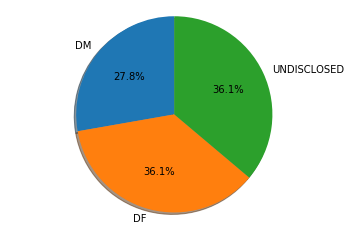

In [82]:
import matplotlib.pyplot as plt
labels = 'DM', 'DF', 'UNDISCLOSED'
sizes = [DM_shape[0]/total_size, DF_shape[0]/total_size, UNDIS_shape[0]/total_size]
explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Split disclosed dataset into train, test and validation
# train: text, gender
# test: name, text, gender
# validation: text, gender

In [63]:
from sklearn.model_selection import train_test_split

# dataset_df = pd.read_csv('train_dataset.csv')
if 'disclosed_dataset_df' in locals():
    # 80/20 train/test
    train_df, test_df = train_test_split(disclosed_dataset_df, test_size=0.2)
    # 80/20 train/validation
    train_df, validation_df = train_test_split(train_df, test_size=0.2)

In [64]:
# extracting related attributes for training, validation and test
train_gender_text_df = train_df[['gender', 'text']]
validation_gender_text_df = validation_df[['gender', 'text']]
test_name_text_gender_df = test_df[['user_name', 'text', 'gender']]

In [65]:
# v2_test_df = pd.read_csv('v2_test_data.csv', engine='python',  encoding='utf-8', error_bad_lines=False, header=None)
# train_gender_text_df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
train_gender_text_df.to_csv(data_dir / 'training_gender_text.csv', index=False, header=False)

In [66]:
# validation_gender_text_df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
validation_gender_text_df.to_csv(data_dir / 'validation_gender_text.csv', index=False, header=False)

In [67]:
# test_name_text_gender_df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
test_name_text_gender_df.to_csv(data_dir / 'test_name_text_gender.csv', index=False, header=False)

# Helper function removing escape chars and checking if successfully removed

In [ ]:
# Legacy
def remove_(x):
    x = str(x).replace('\n', ' ')
    return x

v1_test_df['Review'] = v1_test_df[1].apply(lambda x:remove_(x))

def check(x):
    if '\n' in x:
        return True
    return False

v1_test_df['check'] = v1_test_df['Review'].apply(lambda x:check(x))